# Frequent Itemset Analysis
Frequent itemset analysis is a data mining technique used to discover patterns or associations between items in large datasets. It is commonly applied in market basket analysis, where the qoal is to find sets of items that frequently co-occur in transactions.

In [ ]:
# Importing libraries
import pandas as pd
import random
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

To perform frequent itemset analysis, we will first need to simulate a dataset of transactions. This dataset will consist of multiple transactions, each containing a list of items purchased together. We will then apply the Apriori algorithm to identify frequent itemsets based on a specified minimum support threshold.

## Simulating Transaction Data



In [ ]:
#[Patricia] Pool of 30 Supermarket Items
items = [
    "milk", "bread", "butter", "eggs", "cheese", "apples", "bananas", "chicken", "beef", "pasta",
    "rice", "flour", "sugar", "salt", "pepper", "onions", "tomatoes", "carrots", "potatoes", "cereal",
    "oil", "juice", "yogurt", "tea", "coffee", "chocolate", "cookies", "soap", "shampoo", "toothpaste"
]

#[Suezan]Set a random seed for reproducibility of the transaction generation
random.seed(69)
#[Suezan] Initialize an empty list to store the generated transactions
transactions = []
#[Suezan Loop 3000 times to generate 3000 transactions
for _ in range(3000):
#[Suezan] Randomly select the number of items for the current transaction (between 2 and 7)
    num_items = random.randint(2, 7)
    # Randomly select 'num_items' unique items from the 'items' pool for the current transaction
    transaction = random.sample(items, num_items)
    # Adding the generated transaction to the list of all transactions
    transactions.append(transaction)

#[Arlen] Convert the list of transactions into a Pandas DataFrame
transactions_df = pd.DataFrame(transactions)
#[Arlen] Create the 'data' directory if it doesn't exist to store output files
os.makedirs('data', exist_ok=True)
#[Arlen] Save the raw transactions DataFrame to a CSV file without the index
transactions_df.to_csv('data/supermarket_transactions.csv', index=False)

# Display
transactions_df.head()

,0,1,2,3,4,5,6
0,bread,eggs,chocolate,apples,butter,cereal,flour
1,toothpaste,soap,chocolate,carrots,None,None,None
2,pepper,cookies,salt,potatoes,tomatoes,None,None
3,carrots,chocolate,pepper,cheese,None,None,None
4,sugar,butter,salt,pasta,cheese,None,None


## 2. Preprocessing Data: Using One-Hot Encoding

In [ ]:
#[Calvin] Initialize the TransactionEncoder
encoder = TransactionEncoder()
#[Calvin]  Fit the encoder to the transactions and transform them into a one-hot encoded array
encoded_array = encoder.fit_transform(transactions)
#[Calvin]  Convert the one-hot encoded array into a Pandas DataFrame, using item names as column headers
onehot_df = pd.DataFrame(encoded_array, columns=encoder.columns_)
onehot_df.head()

,apples,bananas,beef,bread,butter,carrots,cereal,cheese,chicken,chocolate,...,potatoes,rice,salt,shampoo,soap,sugar,tea,tomatoes,toothpaste,yogurt
0,True,False,False,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


## 3. Generating Frequent Itemsets with Apriori from the previous Week

In [ ]:
#[Samantha] Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.05
#[Samantha] 'use_colnames=True' ensures that item names are used instead of column indices
frequent_itemsets = apriori(onehot_df, min_support=0.05, use_colnames=True)
#[Samantha] Add a 'length' column to the DataFrame, representing the number of items in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

#### Saving the topn 10 frequent itemsets to CSV

In [ ]:
#[Calvin] Sort frequent itemsets by support in descending order and display the top 10
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))
#[Calvin] Save all frequent itemsets (not just filtered by length) to a CSV file
#[Calvin] This ensures all discovered frequent itemsets are recorded.
frequent_itemsets.to_csv('data/frequent_itemsets.csv', index=False)

     support     itemsets  length
6   0.162000     (cereal)       1
3   0.159667      (bread)       1
26  0.159333        (tea)       1
27  0.158667   (tomatoes)       1
2   0.156667       (beef)       1
1   0.155000    (bananas)       1
19  0.154000     (pepper)       1
9   0.153333  (chocolate)       1
5   0.152333    (carrots)       1
18  0.152000      (pasta)       1


#### Closed Itemsets


In [ ]:
#[Tanveer] Create a copy of frequent itemsets to identify closed itemsets
closed_itemsets = frequent_itemsets.copy()
#[Tanveer] Initialize a boolean mask to mark closed itemsets
closed_mask = []

#[Tanveer] Iterate through each frequent itemset to check if it's closed
for i, row in closed_itemsets.iterrows():
    #  Assume the current itemset is closed until proven otherwise
    is_closed = True
    # Iterate through all other frequent itemsets to find supersets
    for j, other_row in frequent_itemsets.iterrows():
        # Check if 'row' is a subset of 'other_row' (i.e., 'other_row' is a superset of 'row')
        # And if they have the exact same support value
        if row['itemsets'] < other_row['itemsets'] and row['support'] == other_row['support']:
            # If such a superset with the same support exists, the current itemset is NOT closed
            is_closed = False
            # No need to check further supersets for this 'row', break the inner loop
            break
    # Append the determination (True/False) for the current itemset to the mask
    closed_mask.append(is_closed)

#[Tanveer] Filter the closed_itemsets DataFrame using the generated mask
closed_itemsets = closed_itemsets[closed_mask]
#[Tanveer] Save the identified closed itemsets to a CSV file
closed_itemsets.to_csv("data/closed_itemsets.csv", index=False)
#[Tanveer] Display the closed itemsets DataFrame
closed_itemsets.head(10)

,support,itemsets,length
0,0.147333,(apples),1
1,0.155000,(bananas),1
2,0.156667,(beef),1
3,0.159667,(bread),1
4,0.144000,(butter),1
5,0.152333,(carrots),1
6,0.162000,(cereal),1
7,0.148333,(cheese),1
8,0.143000,(chicken),1
9,0.153333,(chocolate),1


#### Maximal Itemsets

In [ ]:
#[patricia] Create a copy of frequent itemsets to identify maximal itemsets
maximal_itemsets = frequent_itemsets.copy()
# [patriciaInitialize a boolean mask to mark maximal itemsets
maximal_mask = []

# [Tanveer] Iterate through each frequent itemset to check if it's maximal
for i, row in maximal_itemsets.iterrows():
    # Assume the current itemset is maximal until proven otherwise
    is_maximal = True
    # Iterate through all other frequent itemsets to find supersets
    for j, other_row in frequent_itemsets.iterrows():
        # Check if 'row' is a subset of 'other_row' (i.e., 'other_row' is a superset of 'row')
        # If a superset exists, the current itemset is NOT maximal
        if row['itemsets'] < other_row['itemsets']:
            is_maximal = False
            # No need to check further supersets for this 'row', break the inner loop
            break
    # Append the determination (True/False) for the current itemset to the mask
    maximal_mask.append(is_maximal)

#[Samantha]Filter the maximal_itemsets DataFrame using the generated mask
maximal_itemsets = maximal_itemsets[maximal_mask]
#[Samantha] Save the identified maximal itemsets to a CSV file
maximal_itemsets.to_csv("data/maximal_itemsets.csv", index=False)
#[Samantha] Display the maximal itemsets DataFrame
maximal_itemsets.head(10)

,support,itemsets,length
0,0.147333,(apples),1
1,0.155000,(bananas),1
2,0.156667,(beef),1
3,0.159667,(bread),1
4,0.144000,(butter),1
5,0.152333,(carrots),1
6,0.162000,(cereal),1
7,0.148333,(cheese),1
8,0.143000,(chicken),1
9,0.153333,(chocolate),1


* *Support*: The proportion of transactions that contain a specific itemset.
* *Itemset*: A set of items that appear together in a transaction.
* *Length*: Number of items in the itemset.

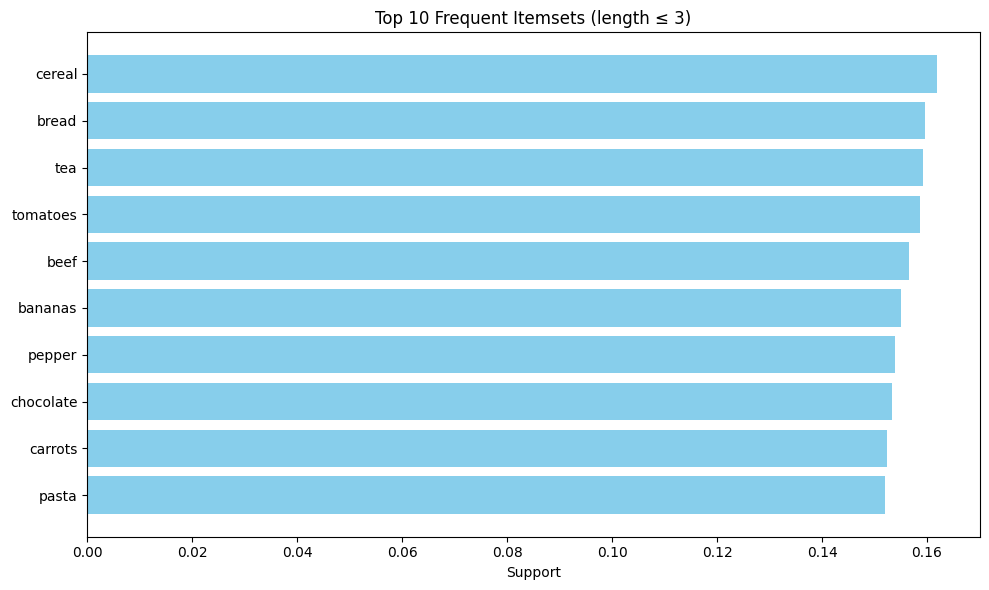

In [ ]:
import matplotlib.pyplot as plt

# Filter itemsets of length 1–3
filtered = frequent_itemsets[frequent_itemsets['length'] <= 3]
top_support = filtered.sort_values(by='support', ascending=False).head(10)

# Convert frozenset to string for plotting
top_support['itemsets_str'] = top_support['itemsets'].apply(lambda x: ', '.join(list(x)))

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_support['itemsets_str'], top_support['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets (length ≤ 3)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
